In [1]:
import os
os.chdir("../")
import torch
import warnings
warnings.filterwarnings('ignore')

import GCAST
os.environ["R_HOME"] = "/public/home/ljquan/anaconda3/envs/myx/lib/R"
random_seed = 2025
device = "cuda" if torch.cuda.is_available() else "cpu"
packnames = ('mclust',)


## The datastes of v10x Mouse Anterior and Mouse Posterior were used to evaluate the cross-region integration of GCAST

In [2]:
data_root = "./Dataset/v10x/cross-region"
sample_name =[
    "Mouse_Brain_Anterior",
    "Mouse_Brain_Posterior",
]
n_clusters=25
negi = 12 

In [3]:
GCAST.set_seed(random_seed)
adata, graph_dict = GCAST.Load10xST(data_root, sample_name, n_clusters,negi= negi, n_top_genes = 6000, mode="batch", label=False).data()
net = GCAST.GCAST(adata.obsm["X_pca"], graph_dict, device=device,model_path=f"{data_root}", model_name=f"AP")
net.train_with_dec()

 31%|███       | 306/1000 [01:06<02:31,  4.59it/s]


## Extract embedding for Cross-region integration of v10x Mouse Anterior and Mouse Posterior 
> **Note:**   
> (1) After loading the `adata` object and the graph using `Load10xST()`, you can skip the `train_with_dec()` step.   
> (2) The related data and **pretrained model** `AP.pth` are available at the following link:   
> https://pan.quark.cn/s/fa511e11c294 (in fold `../Dataset/v10x/cross-region/`).   
> (3) By loading the trained weights in `AP.pth` and setting the network to evaluation mode (`net.eval()`), you can automatically reproduce the results in the paper.


In [4]:
# # Calling net.eval() can load "../test/Dataset/v10x/cross-region/AP.pth"
adata.obsm["emb"] = net.eval()
adata = GCAST.hm_integration(adata, harmony_key='emb')  

2026-02-18 01:19:45,262 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2026-02-18 01:19:46,362 - harmonypy - INFO - sklearn.KMeans initialization complete.
2026-02-18 01:19:46,398 - harmonypy - INFO - Iteration 1 of 10
2026-02-18 01:19:47,264 - harmonypy - INFO - Iteration 2 of 10
2026-02-18 01:19:48,138 - harmonypy - INFO - Iteration 3 of 10
2026-02-18 01:19:48,985 - harmonypy - INFO - Iteration 4 of 10
2026-02-18 01:19:49,853 - harmonypy - INFO - Iteration 5 of 10
2026-02-18 01:19:50,704 - harmonypy - INFO - Iteration 6 of 10
2026-02-18 01:19:51,588 - harmonypy - INFO - Iteration 7 of 10
2026-02-18 01:19:52,648 - harmonypy - INFO - Iteration 8 of 10
2026-02-18 01:19:53,497 - harmonypy - INFO - Iteration 9 of 10
2026-02-18 01:19:54,343 - harmonypy - INFO - Iteration 10 of 10
2026-02-18 01:19:55,205 - harmonypy - INFO - Stopped before convergence


In [5]:
GCAST.KMeans_Cluster(adata, n_clusters=n_clusters)
GCAST.evaluate_cluster(adata,mode=1, method_name="KMeans")


KMeans SC:0.3135978488500166 DB:1.1923473574627212


## Spatial visualization of Mouse Anterior and Mouse Posterior integration 
> **Note**   
> Coordinate-aligned transcriptomic files are provided to enable direct reproduction of the visualization results presented in the paper.


In [6]:
import anndata 
adata_processed = anndata.read_h5ad("./Dataset/v10x/cross-region/adata_crossregion.h5ad")

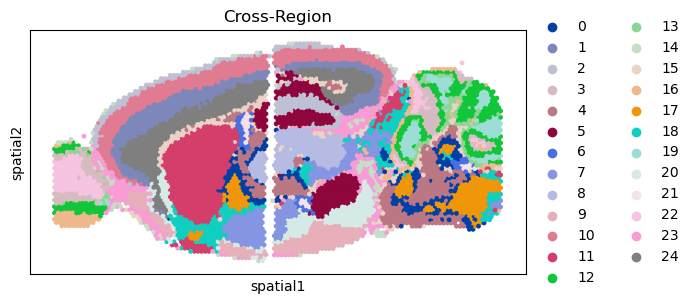

In [7]:
GCAST.plot_spatial(adata_processed, color="KMeans", title="Cross-Region",  save=False, show=True)

In [8]:
GCAST.eval_batch(adata, output_key="emb", label=False)

median ILISI:1.1770850844839218 


array([1.47750212, 1.78196233, 1.99541663, ..., 1.24804676, 1.00150285,
       1.95982183])